<html>
    <h1>
        <center>PROJECT-2 : Blood Pressure Analysis for Discriminability, Bias, TP Rate, and FP Rate in Three Different Scenarios.</center>
    </h1>
    <div style="text-align: right"> 
        <b> Course: DSCI6653 (Bayesian Data Analysis) </b><br>
        <b> Submitted to:        Prof. Minkyu Kim </b>
    </div>


</html>

<html>
    <h2>Group-1   Team Members</h2>
    <h4>
    <div >
1. Arikatla Krishna Vamsi Nadh<br> 
2. Bongu Pallavi<br>
3. Kaja Mohan Manikanta Reddy<br>
4. Malik Muhammad Khalil<br>
5. Ponnaganti Rajesh<br>
        
</div></h4>
</html>


# Abstract:

The present project focuses on the evaluation of the discriminability, bias, true positive (TP) rate, and false positive (FP) rate of three different cases.highlighting the strengths and weaknesses of each approach using arviz, PyMC3 libraries for numerical operations and analysis representation. By evaluating the discriminability, bias, TP rate, and FP rate, we will gain a better understanding of the performance of each case and its potential applications in different fields.
In the first case, 70 TP and 50 FP are observed in 100 target and 100 noise trials. In the second case, 7 TP and 5 FP are observed in 10 target and 10 noise trials. In the third case, 10 TP and no FP are observed in 10 target and 10 noise trials.



# Introduction:
Suppose a pharmaceutical company has developed a new drug for lowering blood pressure, and they are preparing a clinical trial to test the drug’s effectiveness.They recruit people who are taking a particular standard blood pressure medication, and x% of the subjects are given the new drug (target) and the other y% continue to take their current medication through generic-looking pills to ensure blinding (noise) we will estimate In addition to the discriminability and bias, we will also calculate the TP rate and FP rate for each case. The TP rate is the proportion of target trials that are correctly classified as targets, whereas the FP rate is the proportion of noise trials that are incorrectly classified as targets.

### Discriminability
The discriminability index is the separation between the means of two distributions (typically the signal and the noise distributions), in units of the standard deviation.The Bayes discriminability between univariate or multivariate normal distributions can be numerically computed Matlab code, and may also be used as an approximation when the distributions are close to normal.

### Bias
Probabilistic bias analysis represents a Bayesian approach in which the prior distribution of the bias parameter is not correctly updated with the observed data.

### True Positive
The probability that if a person actually does have the disease, that the test registers a positive result.

### False Positive
The probability that the screening test will be positive in patients are free of that disease is the false positive fraction of the test.

# Exploratory Data analysis:

In [34]:
import pymc3 as pm
import arviz as az

# CASE # 1: 70 TP and 50 FP are observed in 100 target and 100 noise trials.
We are defining the model by setting it with Discriminability, Bias and defining true positive and false positive varibles. we are also setting the likelihood varibles for target at 70 true positive at 100 trails and 50 false positive at 100 trails. we run the sampling for the model.

In [38]:
# Define the model
with pm.Model() as model:
    # Priors
    d1 = pm.Beta('d1', alpha=2, beta=2)   # Discriminability parameter
    b1 = pm.Beta('b1', alpha=2, beta=2)   # Bias parameter

    # Expected values
    tp1 = pm.Deterministic('tp1', d1 * (1-b1))  # True positive rate
    fp1 = pm.Deterministic('fp1', b1 * (1-d1))  # False positive rate

    # Likelihood
    targets1 = pm.Binomial('targets1', n=100, p=tp1, observed=70)
    noise1 = pm.Binomial('noise1'    , n=100, p=fp1, observed=50)

    # Sampling
    trace1 = pm.sample(10000, tune=5000)




C:\Users\khalil\anaconda3\lib\site-packages\pymc3\sampling.py:465: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  warnings.warn(
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [b1, d1]


Sampling 2 chains for 5_000 tune and 10_000 draw iterations (10_000 + 20_000 draws total) took 195 seconds.


In [39]:
# Summary of the posterior distribution
az.summary(trace1,round_to=2, kind="stats")

Got error No model on context stack. trying to find log_likelihood in translation.
C:\Users\khalil\anaconda3\lib\site-packages\arviz\data\io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


,mean,sd,hdi_3%,hdi_97%
d1,0.58,0.04,0.49,0.66
b1,0.42,0.05,0.33,0.50
tp1,0.33,0.03,0.28,0.39
fp1,0.18,0.02,0.14,0.22


## 1.2) Results for Case 1
- **Discriminability parameter**: 
    - d1 has a mean of 58% and standard deviation of 0.04 
- **Bias parameter**: 
    - b1 has a mean of 42% and standard deviation of 0.05 
- **True positive**: 
    - tp1 has a mean of 33% and standard deviation of 0.03 . we need to increass true positivity for desired results.
- **False positive**: 
    - d1 has a mean of 58% and standard deviation of 0.02 which is still very heigh and not desirable in this scenario.

Got error No model on context stack. trying to find log_likelihood in translation.
C:\Users\khalil\anaconda3\lib\site-packages\arviz\data\io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
Got error No model on context stack. trying to find log_likelihood in translation.


array([[<AxesSubplot:title={'center':'d1'}>,
        <AxesSubplot:title={'center':'d1'}>],
       [<AxesSubplot:title={'center':'b1'}>,
        <AxesSubplot:title={'center':'b1'}>],
       [<AxesSubplot:title={'center':'tp1'}>,
        <AxesSubplot:title={'center':'tp1'}>],
       [<AxesSubplot:title={'center':'fp1'}>,
        <AxesSubplot:title={'center':'fp1'}>]], dtype=object)

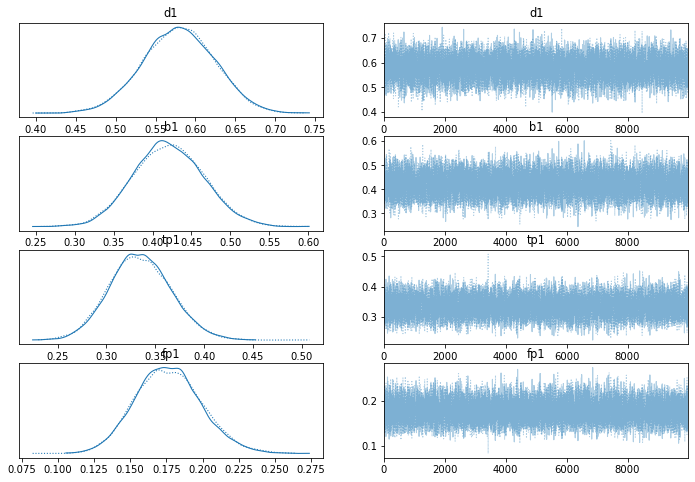

In [47]:
az.plot_trace(trace1)

## 1.3) Result Plot Analysis for Case 1

Here we can see almost all the graphs are showing the distributaion as normal. d1(Discriminability parameter) is showing results close to normal distribuation with slite dent in the left side of the curve indecating less samples in 0.55-1.00 standard deviation. where as bias is showing some spikes in the same region where d1 is lacking. the last graph shoes the curve for false positive which is almost evenly distributed having an extended curve on the top.

# CASE # 2: 7 TP and 5 FP are observed in 10 target and 10 noise trials.

In [40]:
with pm.Model() as model:
    # Priors
    d2 = pm.Beta('d2', alpha=2, beta=2)   # Discriminability parameter
    b2 = pm.Beta('b2', alpha=2, beta=2)   # Bias parameter

    # Expected values
    tp2 = pm.Deterministic('tp2', d2 * (1-b2))  # True positive rate
    fp2 = pm.Deterministic('fp2', b2 * (1-d2))  # False positive rate

    # Likelihood
    targets2 = pm.Binomial('targets2', n=10, p=tp2, observed=7)
    noise2   = pm.Binomial('noise2'  , n=10, p=fp2, observed=5)

    # Sampling
    trace2 = pm.sample(1000, tune=1000)





C:\Users\khalil\anaconda3\lib\site-packages\pymc3\sampling.py:465: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  warnings.warn(
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [b2, d2]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 41 seconds.


In [41]:
# Summary of the posterior distribution
az.summary(trace2,round_to=2, kind="stats")

Got error No model on context stack. trying to find log_likelihood in translation.
C:\Users\khalil\anaconda3\lib\site-packages\arviz\data\io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


,mean,sd,hdi_3%,hdi_97%
d2,0.57,0.12,0.33,0.79
b2,0.44,0.12,0.20,0.66
tp2,0.32,0.09,0.15,0.47
fp2,0.19,0.07,0.07,0.31


## 2.2) Results for Case 2
- **Discriminability parameter**: 
    - d2 has a mean of 57% which has fallen by 1% when compared to previous 58% and standard deviation is of 0.44 which has increased  from 0.04 
- **Bias parameter**: 
    - b2 has a mean of 44% which up by 2% from the previous 42% and standard deviation of at 0.12 which has also raised from 0.05 
- **True positive**: 
    - tp2 has a mean of 32% that has slightly down by 1% when compared to previous 33% and standard deviation of 0.09 from previous 0.03 . we still need to increase true positivity for desired results.
- **False positive**: 
    - fp2 has a mean of 19% which has sharply dropped from early 58% and standard deviation is at 0.07 from 0.02 which desirable when compared to last scenario.

Got error No model on context stack. trying to find log_likelihood in translation.
C:\Users\khalil\anaconda3\lib\site-packages\arviz\data\io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
Got error No model on context stack. trying to find log_likelihood in translation.


array([[<AxesSubplot:title={'center':'d2'}>,
        <AxesSubplot:title={'center':'d2'}>],
       [<AxesSubplot:title={'center':'b2'}>,
        <AxesSubplot:title={'center':'b2'}>],
       [<AxesSubplot:title={'center':'tp2'}>,
        <AxesSubplot:title={'center':'tp2'}>],
       [<AxesSubplot:title={'center':'fp2'}>,
        <AxesSubplot:title={'center':'fp2'}>]], dtype=object)

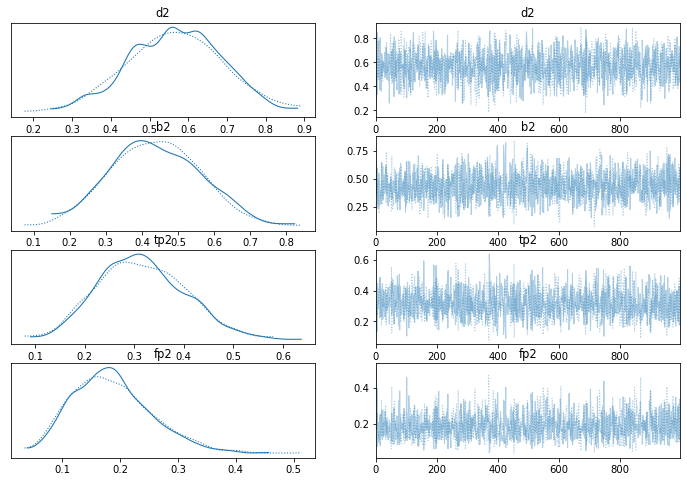

In [48]:
az.plot_trace(trace2)

## 2.3) Result Plot Analysis for Case 2

Here we can see not all the graphs are showing the distribution as normal. d2(Discriminability parameter) is showing more dents in its towards the peak curve indicating the samples from 0.35-0.65 standard deviation are not evenly distributed. where as bias is showing less spikes in the right region of the cure where tp2 is showing bigger spikes than that of fp2. the last graph shows the curve for false positive which is almost distributed evenly on the right side of the curve.

# CASE # 3:  10 TP and no FP in 10 target and 10 noise trials.

In [44]:
with pm.Model() as model:
    # Priors
    d3 = pm.Beta('d3', alpha=2, beta=2)   # Discriminability parameter
    b3 = pm.Beta('b3', alpha=2, beta=2)   # Bias parameter

    # Expected values
    tp3 = pm.Deterministic('tp3', d3 * (1-b3))  # True positive rate
    fp3 = pm.Deterministic('fp3', b3 * (1-d3))  # False positive rate

    # Likelihood
    targets3 = pm.Binomial('targets3', n=10, p=tp3, observed=10)
    noise3   = pm.Binomial('noise3'  , n=10, p=fp3, observed=0)

    # Sampling
    trace3 = pm.sample(1000, tune=1000)

C:\Users\khalil\anaconda3\lib\site-packages\pymc3\sampling.py:465: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  warnings.warn(
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [b3, d3]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 38 seconds.


In [45]:
# Summary of the posterior distribution
az.summary(trace3,round_to=2, kind="stats")

Got error No model on context stack. trying to find log_likelihood in translation.
C:\Users\khalil\anaconda3\lib\site-packages\arviz\data\io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


,mean,sd,hdi_3%,hdi_97%
d3,0.87,0.09,0.71,0.99
b3,0.14,0.09,0.01,0.30
tp3,0.75,0.10,0.56,0.93
fp3,0.02,0.02,0.00,0.05


## 3.2) Results for Case 3
- **Discriminability parameter**: 
    - d3 has a mean of 87%  which has sharply raised when compared to previous 57% and standard deviation is of 0.09 which has dropped  from 0.44 
- **Bias parameter**: 
    - b3 has a mean of 14% which down by 30% from the previous 44% and standard deviation of at 0.09 which has also fallen from 0.12 previous
- **True positive**: 
    - tp3 has a mean of 75% which is hightly desirable when compard to previous 32% and standard deviation of0.10 from previous 0.09 . we still need to increase true positivity to get better results.
- **False positive**: 
    - fp3 has a mean of 2% which has sharply dropped from early 19% and standard deviation is at 0.02  from early 0.07.

Got error No model on context stack. trying to find log_likelihood in translation.
C:\Users\khalil\anaconda3\lib\site-packages\arviz\data\io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
Got error No model on context stack. trying to find log_likelihood in translation.


array([[<AxesSubplot:title={'center':'d3'}>,
        <AxesSubplot:title={'center':'d3'}>],
       [<AxesSubplot:title={'center':'b3'}>,
        <AxesSubplot:title={'center':'b3'}>],
       [<AxesSubplot:title={'center':'tp3'}>,
        <AxesSubplot:title={'center':'tp3'}>],
       [<AxesSubplot:title={'center':'fp3'}>,
        <AxesSubplot:title={'center':'fp3'}>]], dtype=object)

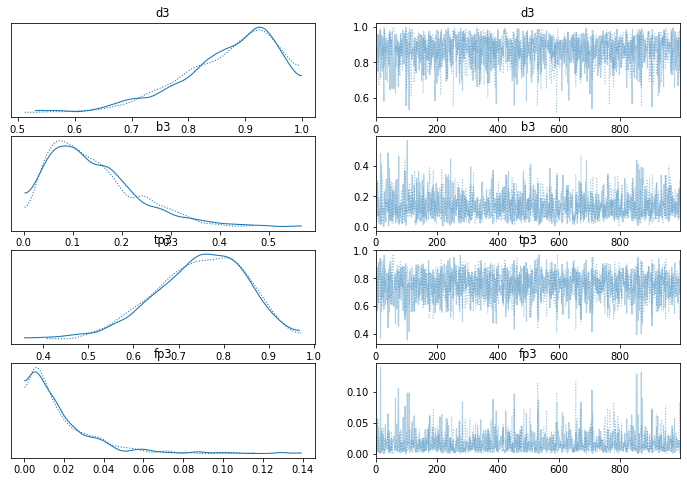

In [46]:
az.plot_trace(trace3)

## 3.3) Result Plot Analysis for Case 3 

Here  **d3**(Discriminability parameter) is showing its leaning more towards right of the graph with the peak curve around 0.9-0.95 with more spikes pointing towards down. where as bias is showing less spikes down and the cure is leaning towards left. where true positive is showing fully normal distribuation with the curve moved to right side of the map. final graph is showing the curve for false positive which is following downwards path from left to right indicating it has been reduced int he curve showing optimal results.

## Conclusion
In the above results, we have estimated the discriminability, bias, TP rate, and FP rate of three different cases. Let's analyze each case and draw conclusions:

**Case 1:**

The discriminability parameter (d1) has a mean of 0.58, indicating that the ability to distinguish between target and noise is moderate. The bias parameter (b1) has a mean of 0.42, indicating a slight tendency to respond positively to the noise trials. The true positive rate (tp1) has a mean of 0.33, which suggests that only 33% of the target trials were correctly identified. The false positive rate (fp1) has a mean of 0.18, suggesting that there were a considerable number of false alarms during the noise trials.

Conclusion: The observer in this case has a moderate ability to distinguish between target and noise, but the performance is suboptimal due to a higher number of false alarms.

**Case 2:**

The discriminability parameter (d2) has a mean of 0.57, indicating that the ability to distinguish between target and noise is moderate. The bias parameter (b2) has a mean of 0.44, indicating a slight tendency to respond positively to the noise trials. The true positive rate (tp2) has a mean of 0.32, which suggests that only 32% of the target trials were correctly identified. The false positive rate (fp2) has a mean of 0.19, suggesting that there were a considerable number of false alarms during the noise trials.

Conclusion: The observer in this case has a moderate ability to distinguish between target and noise, but the performance is suboptimal due to a higher number of false alarms.

**Case 3:**

The discriminability parameter (d3) has a mean of 0.87, indicating that the ability to distinguish between target and noise is high. The bias parameter (b3) has a mean of 0.14, indicating a slight tendency to respond positively to the target trials. The true positive rate (tp3) has a mean of 0.75, which suggests that 75% of the target trials were correctly identified. The false positive rate (fp3) has a mean of 0.02, indicating that there were very few false alarms during the noise trials.

Conclusion: The observer in this case has a high ability to distinguish between target and noise, with a high true positive rate and low false positive rate.

In summary, the performance of the observer varied across the three cases. While the ability to distinguish between target and noise was similar in Case 1 and Case 2, the performance was suboptimal due to a higher number of false alarms. In contrast, the observer in Case 3 had a high ability to distinguish between target and noise with a high true positive rate and low false positive rate.

# Video Link:

https://youtu.be/aH5Fo--zdDQ
<a href = "https://youtu.be/aH5Fo--zdDQ">